In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## KNN

MSE: 1.1908171715021176


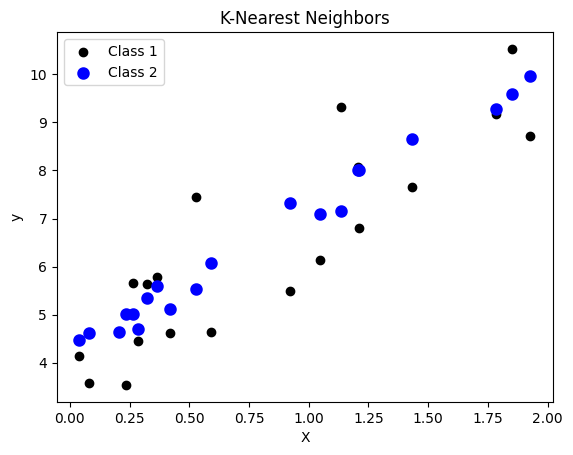

In [18]:
# Generación de datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación del modelo KNN
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predicción
y_pred = knn_reg.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Gráfica
plt.scatter(X_test, y_test, color='black', label="Class 1")
plt.scatter(X_test, y_pred, color='blue', label="Class 2", linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('K-Nearest Neighbors')
plt.legend()
plt.show()


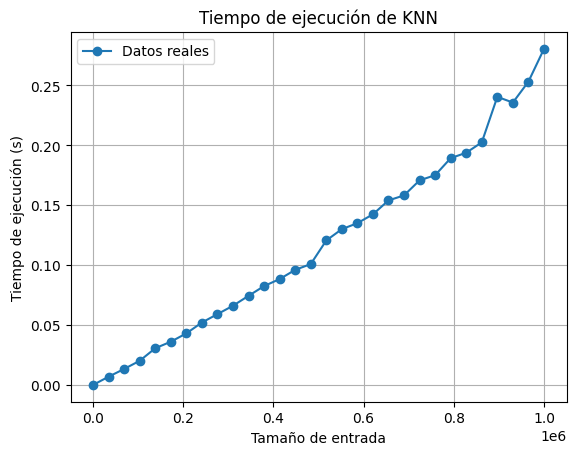

In [19]:
# Función para generar datos sintéticos
def generate_data(n, d=1):
    X = 2 * np.random.rand(n, d)
    y = 4 + 3 * np.sum(X, axis=1, keepdims=True) + np.random.randn(n, 1)
    return X, y

# Tamaños de entrada 
input_sizes = np.linspace(100, 1000000, 30, dtype=int)

# tiempos de ejecución
times = []
for size in input_sizes:
    X, y = generate_data(size)
    start_time = time.time()
    knn_reg = KNeighborsRegressor(n_neighbors=5)
    knn_reg.fit(X, y)
    end_time = time.time()
    times.append(end_time - start_time)

# Regresión para ajustar O(n log n)
log_n = np.log(input_sizes)  # Logaritmo de n
X_log_n = np.vstack([input_sizes, input_sizes * log_n]).T  # Modelo n + n log n

# Ajuste del modelo
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_log_n, times)

# Predicción de tiempos usando el modelo ajustado
times_pred = poly_reg_model.predict(X_log_n)

# Gráfica de tiempos de ejecución
plt.plot(input_sizes, times, marker='o', label='Datos reales')
# plt.plot(input_sizes, times_pred, label='Ajuste O(n log n)', linestyle='--', color='red')
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución de KNN')
plt.legend()
plt.grid(True)
plt.show()

MSE para regresión lineal: 9.60933345660753e-05
Coeficientes del modelo lineal: [2.6003674e-07]


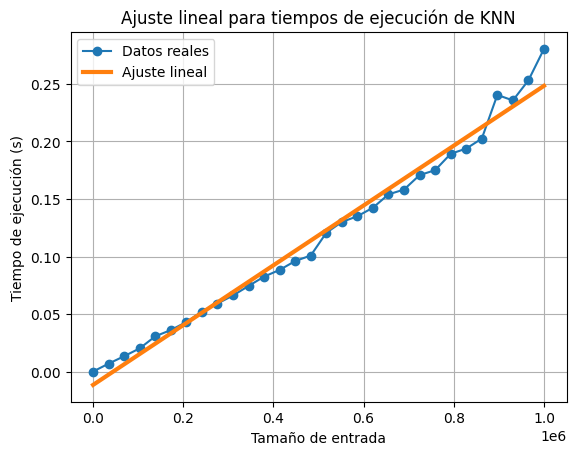

In [20]:
# modelo lineal
linear_reg_model = LinearRegression()
linear_reg_model.fit(input_sizes.reshape(-1, 1), times)

# Predicción de tiempos 
times_pred = linear_reg_model.predict(input_sizes.reshape(-1, 1))

mse_linear = mean_squared_error(times, times_pred)
print(f'MSE para regresión lineal: {mse_linear}')
print(f"Coeficientes del modelo lineal: {linear_reg_model.coef_}")

plt.plot(input_sizes, times, marker='o', label='Datos reales')
plt.plot(input_sizes, times_pred, label='Ajuste lineal', linewidth=3)
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Ajuste lineal para tiempos de ejecución de KNN')
plt.legend()
plt.grid(True)
plt.show()

## Linear Regresion

Coeficientes: [[2.93647151]]
Intercepto: [4.32235853]
R^2: 0.7424452332071367


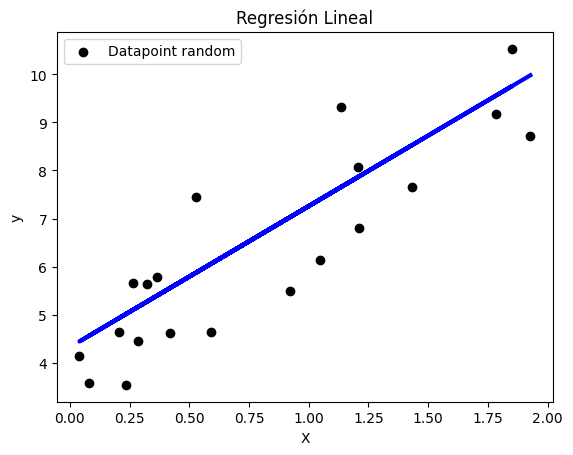

In [21]:
# Generación de datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación del modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicción
y_pred = lin_reg.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
print(f'Coeficientes: {lin_reg.coef_}')
print(f'Intercepto: {lin_reg.intercept_}')
print(f'R^2: {r2}')

# Gráfica
plt.scatter(X_test, y_test, color='black', label='Datapoint random')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

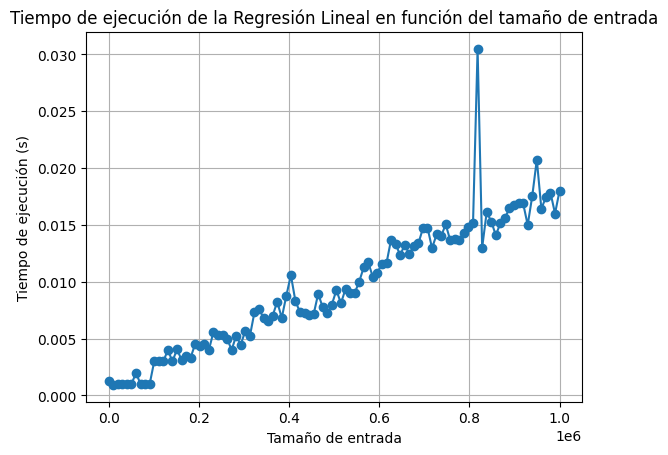

In [24]:
def generate_data(n):
    X = 2 * np.random.rand(n, 1)
    y = 4 + 3 * X + np.random.randn(n, 1)
    return X, y

# Tamaños de entrada para las pruebas
input_sizes = np.linspace(100, 1000000, 100, dtype=int)  


times = []
for size in input_sizes:
    X, y = generate_data(size)
    start_time = time.time()
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    end_time = time.time()
    times.append(end_time - start_time)

# Gráfica 
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Tamaño de entrada')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Tiempo de ejecución de la Regresión Lineal en función del tamaño de entrada')
plt.grid(True)
plt.show()


MSE for linear regression: 3.3018350600142446e-06
Coefficients: [1.81842903e-08]


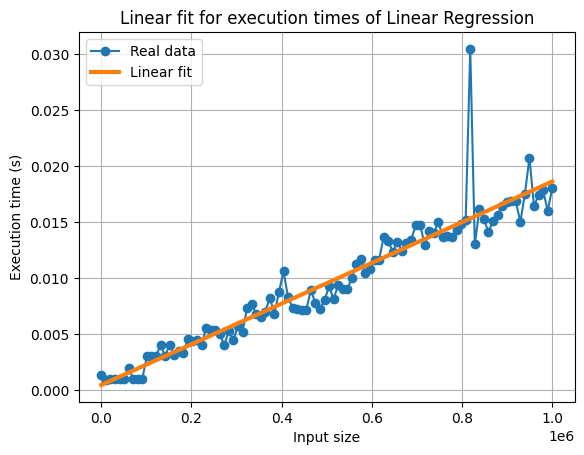

In [25]:
# Linear model
linear_reg_model = LinearRegression()
linear_reg_model.fit(input_sizes.reshape(-1, 1), times)

# Predicting times
times_pred = linear_reg_model.predict(input_sizes.reshape(-1, 1))

mse_linear = mean_squared_error(times, times_pred)
print(f'MSE for linear regression: {mse_linear}')
print(f'Coefficients: {linear_reg_model.coef_}')

# Plotting
plt.plot(input_sizes, times, marker='o', label='Real data')
plt.plot(input_sizes, times_pred, label='Linear fit', linewidth=3)
plt.xlabel('Input size')
plt.ylabel('Execution time (s)')
plt.title('Linear fit for execution times of Linear Regression')
plt.legend()
plt.grid(True)
plt.show()
